In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import datatime as dt



from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [36]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [37]:
# Dropping Unnecessary Columns
df.drop('CustomerID',axis=1,inplace=True)

In [38]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [39]:
# Renaming Columns
df.columns=['Gender','Age','Income','Score']

In [40]:
df.head()

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [41]:
df.shape

(200, 4)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  200 non-null    object
 1   Age     200 non-null    int64 
 2   Income  200 non-null    int64 
 3   Score   200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [43]:
# Checking for Null Values
df.isna().sum()

Gender    0
Age       0
Income    0
Score     0
dtype: int64

# Explaratoty Data Analysis

###### This dataset contains task to find hidden patterns and some cool stuff about the data, so let's just try to find something based on different visualizations!

# Distribution difference Based on Gender

Text(0.5, 1.0, 'Score')

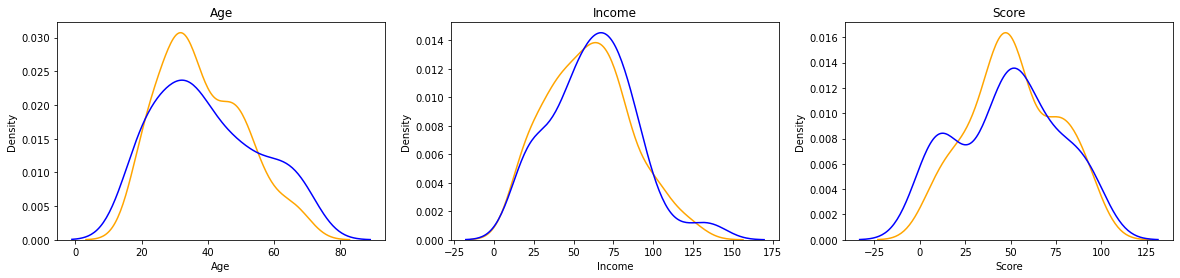

In [44]:
plt.figure(figsize=(20,4))
plt.subplot(1,3,1)
sns.distplot(df.Age[df.Gender=='Female'],color='orange',hist=False,kde=True,label='Female')
sns.distplot(df.Age[df.Gender=='Male'],color='blue',hist=False,kde=True,label='Male')
plt.title('Age')

plt.subplot(1,3,2)
sns.distplot(df.Income[df.Gender=='Female'],color='orange',hist=False,kde=True,label='Female')
sns.distplot(df.Income[df.Gender=='Male'],color='blue',hist=False,kde=True,label='Male')
plt.title('Income')

plt.subplot(1,3,3)
sns.distplot(df.Score[df.Gender=='Female'],color='orange',hist=False,kde=True,label='Female')
sns.distplot(df.Score[df.Gender=='Male'],color='blue',hist=False,kde=True,label='Male')
plt.title('Score')

##### Is there any significant difference based on gender on features Age, Income or Score? You will find there is nothing significant except slightly more females in age around 28 and slightly more females with score around 50.

# Differences in Age, Income and Score by gender

###### Boxplot visualization will be used to see also quartiles, distribution, median and outliers

Text(0.5, 1.0, 'Score')

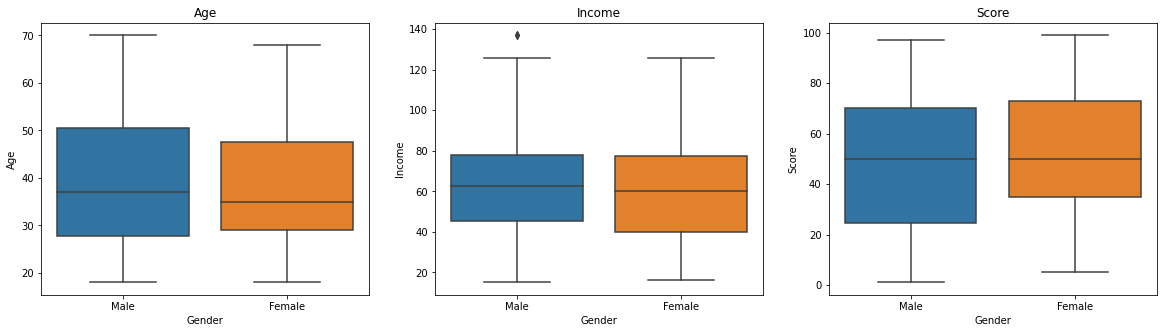

In [45]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(y=df.Age,x=df.Gender)
plt.title('Age')

plt.subplot(1,3,2)
sns.boxplot(y=df.Income,x=df.Gender)
plt.title('Income')

plt.subplot(1,3,3)
sns.boxplot(y=df.Score,x=df.Gender)
plt.title('Score')

In [46]:
# we Only have one outlier so  we dont handle it

In [47]:
#There is no significant difference or finding except that Female seems to have higher bound for lower score (first quartile)
#... but we already know they like to go to shopping malls more likely than Males.

# Scatter plots 

In [48]:
# To find if there is Significant relation between variables

Text(0.5, 1.0, 'Income vs Score')

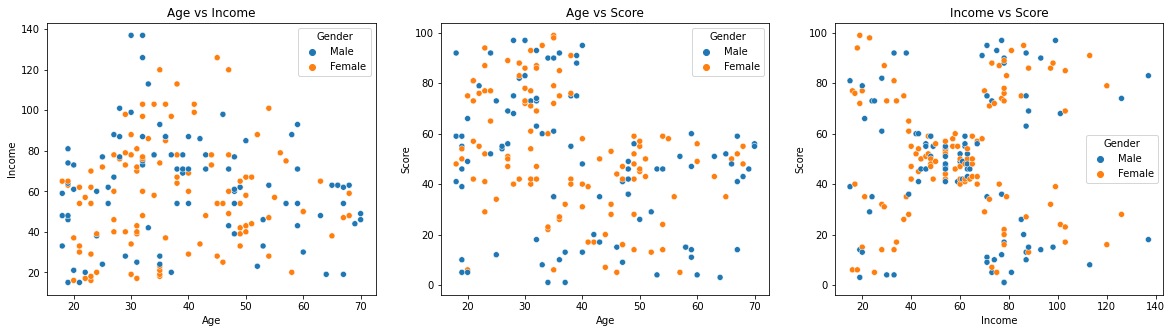

In [49]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.scatterplot(x=df.Age,y=df.Income,hue=df.Gender)
plt.title('Age vs Income')

plt.subplot(1,3,2)
sns.scatterplot(x=df.Age,y=df.Score,hue=df.Gender)
plt.title("Age vs Score")

plt.subplot(1,3,3)
sns.scatterplot(x=df.Income,y=df.Score,hue=df.Gender)
plt.title('Income vs Score')

In [50]:
#we can see there seems to be 2 groups of customers by age vs score (top left quarter vs bottom right quarter),
#where diagonal is delimiting them.

#What is more important is actually chart Income vs Score where we can see 5 different groups of customers (corners & center). 
#What does it mean? We've probably found ideal way to cluster our customers based on income and score!

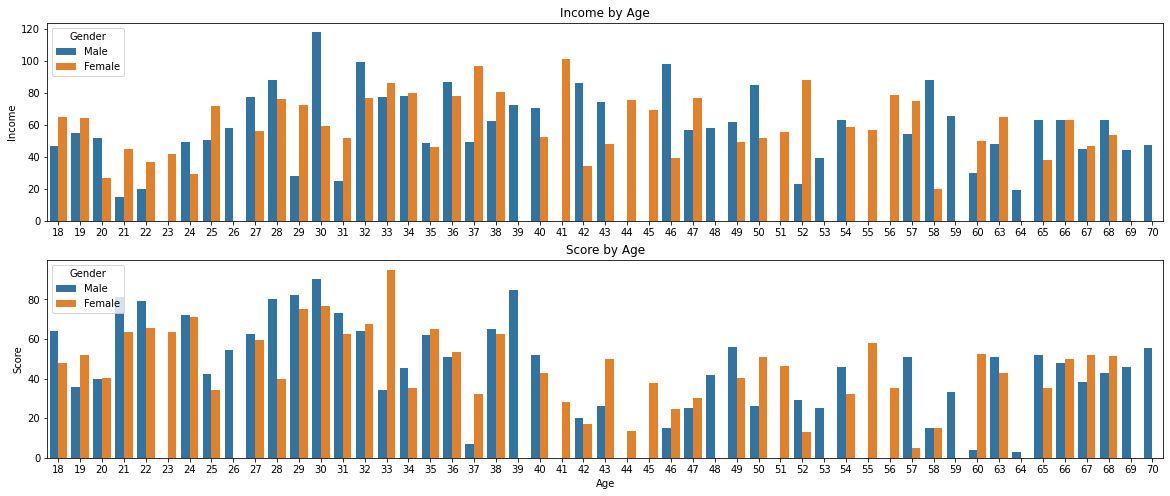

In [51]:
plt.figure(figsize=(20,8))
plt.subplot(2,1,1)
sns.barplot(x=df.Age, y=df.Income, hue=df.Gender, ci=0)
plt.title('Income by Age')
plt.xlabel('')

plt.subplot(2,1,2)
sns.barplot(x=df.Age, y=df.Score, hue=df.Gender, ci=0)
plt.title('Score by Age')

plt.show()

In [52]:
# Income & Score by Age:
#Last, check if there is significant difference (increasing/decreasing trend) when looking on Income or Score by Age. 

#You may notice that income seems to be highest for age group 25-50 comparing to others and
#similary, score is higer for group of people in age 20-40 comparing to others.

In [53]:
df.head()

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [54]:
# one-Hot Encoding
df=pd.get_dummies(df,columns=['Gender'],drop_first=True)
df.head()

,Age,Income,Score,Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [56]:
df=df.rename(columns={'Gender_Male': 'Gender'})

In [57]:
df.head()

,Age,Income,Score,Gender
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [60]:
# create new dataframe with transformed values

df_t=df.copy()
ss=StandardScaler()
df_ts=ss.fit(df_t)
df_tt=ss.transform(df_t)
df_t_scaled=pd.DataFrame(df_tt,columns=df_t.columns)

# Transformed Data

In [62]:
df_t_scaled.head()

,Age,Income,Score,Gender
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


# Original Data

In [63]:
df.head()

,Age,Income,Score,Gender
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


# Transformed vs Original

Text(0.5, 1.0, 'Income vs Score')

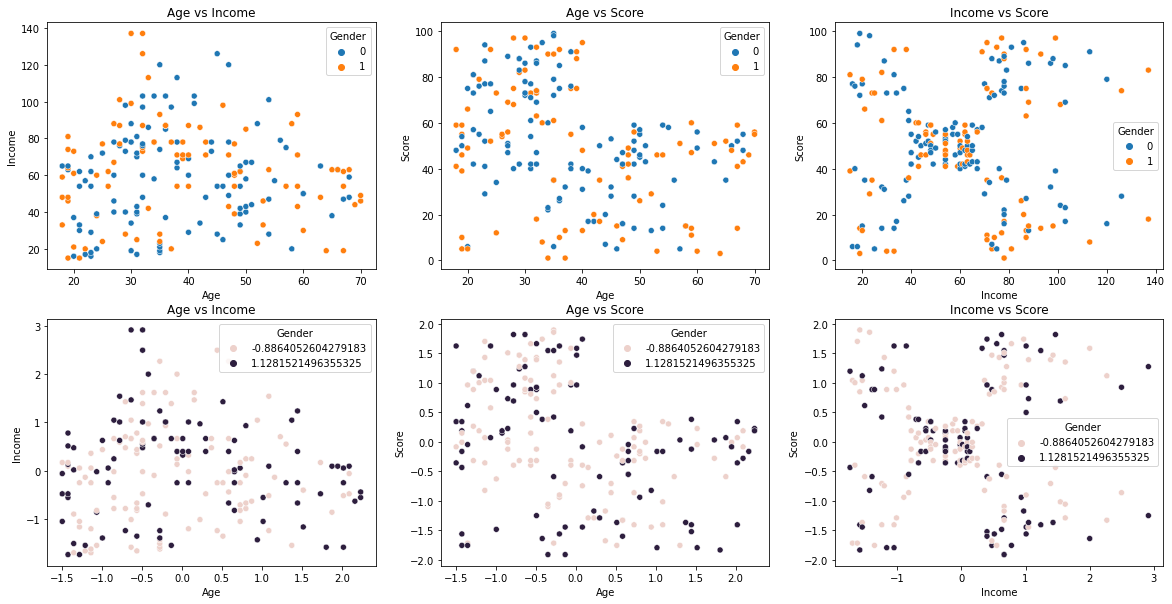

In [66]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.scatterplot(x=df.Age,y=df.Income,hue=df.Gender)
plt.title("Age vs Income")

plt.subplot(2,3,2)
sns.scatterplot(x=df.Age,y=df.Score,hue=df.Gender)
plt.title("Age vs Score")

plt.subplot(2,3,3)
sns.scatterplot(x=df.Income,y=df.Score,hue=df.Gender)
plt.title("Income vs Score")

plt.subplot(2,3,4)
sns.scatterplot(x=df_t_scaled.Age,y=df_t_scaled.Income,hue=df_t_scaled.Gender)
plt.title("Age vs Income")

plt.subplot(2,3,5)
sns.scatterplot(x=df_t_scaled.Age,y=df_t_scaled.Score,hue=df_t_scaled.Gender)
plt.title("Age vs Score")

plt.subplot(2,3,6)
sns.scatterplot(x=df_t_scaled.Income,y=df_t_scaled.Score,hue=df_t_scaled.Gender)
plt.title("Income vs Score")

# Finding Optimum Number of Clusters

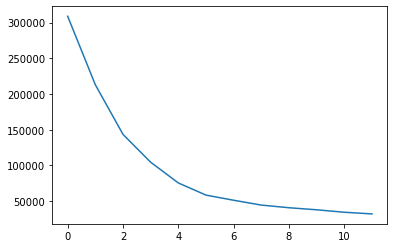

In [72]:
# Elbow Method/SSD
ssd = []
range_n_clusters = [1,2, 3, 4, 5, 6, 7, 8,9,10,11,12]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

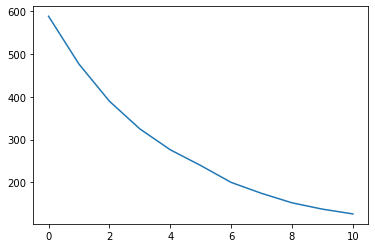

In [69]:
# Elbow Method/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10,11,12]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_t_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

In [97]:
# Final model with k=5
kmeans = KMeans(n_clusters=5, max_iter=50)
kmeans.fit_predict(df)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [98]:
kmeans.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [102]:
df['Clusters']=kmeans.labels_

In [104]:
df.head().append(df.tail())

,Age,Income,Score,Gender,Clusters
0,19,15,39,1,4
1,21,15,81,1,3
2,20,16,6,0,4
3,23,16,77,0,3
4,31,17,40,0,4
195,35,120,79,0,1
196,45,126,28,0,2
197,32,126,74,1,1
198,32,137,18,1,2
199,30,137,83,1,1


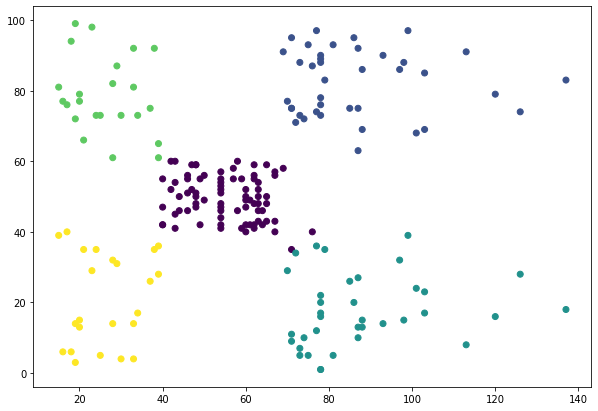

In [105]:
plt.figure(figsize=(10,7))
plt.scatter(df['Income'],df['Score'],c=kmeans.labels_)
plt.show()

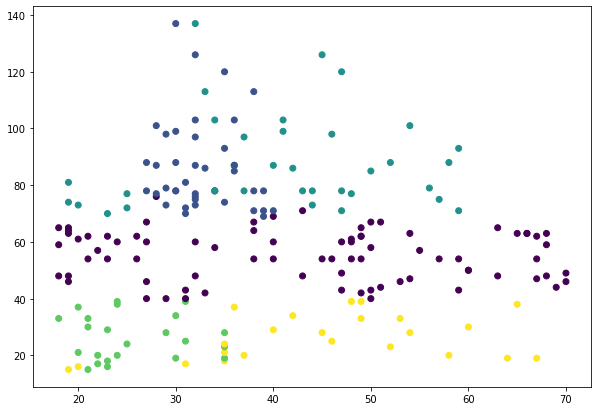

In [101]:
plt.figure(figsize=(10,7))
plt.scatter(df['Age'],df['Income'],c=kmeans.labels_)
plt.show()

In [87]:
# Final model with k=4
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit_predict(df)

array([1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1,
       3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

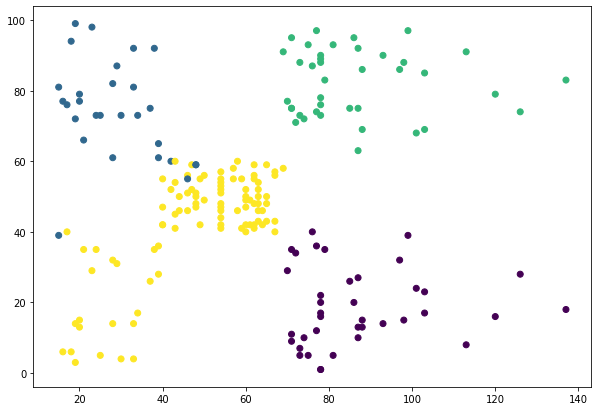

In [88]:
plt.figure(figsize=(10,7))
plt.scatter(df['Income'],df['Score'],c=kmeans.labels_)
plt.show()

In [89]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit_predict(df)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

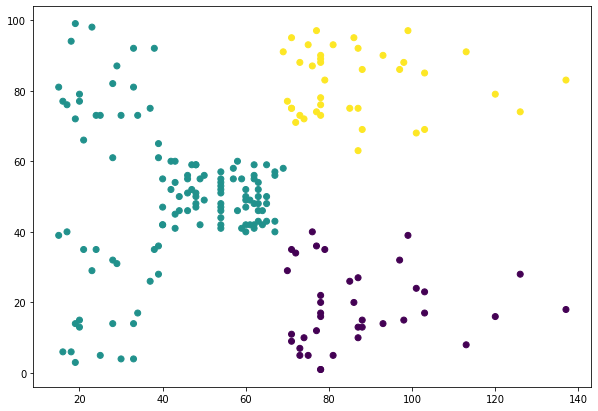

In [90]:
plt.figure(figsize=(10,7))
plt.scatter(df['Income'],df['Score'],c=kmeans.labels_)
plt.show()

# Hierarchical Clustering

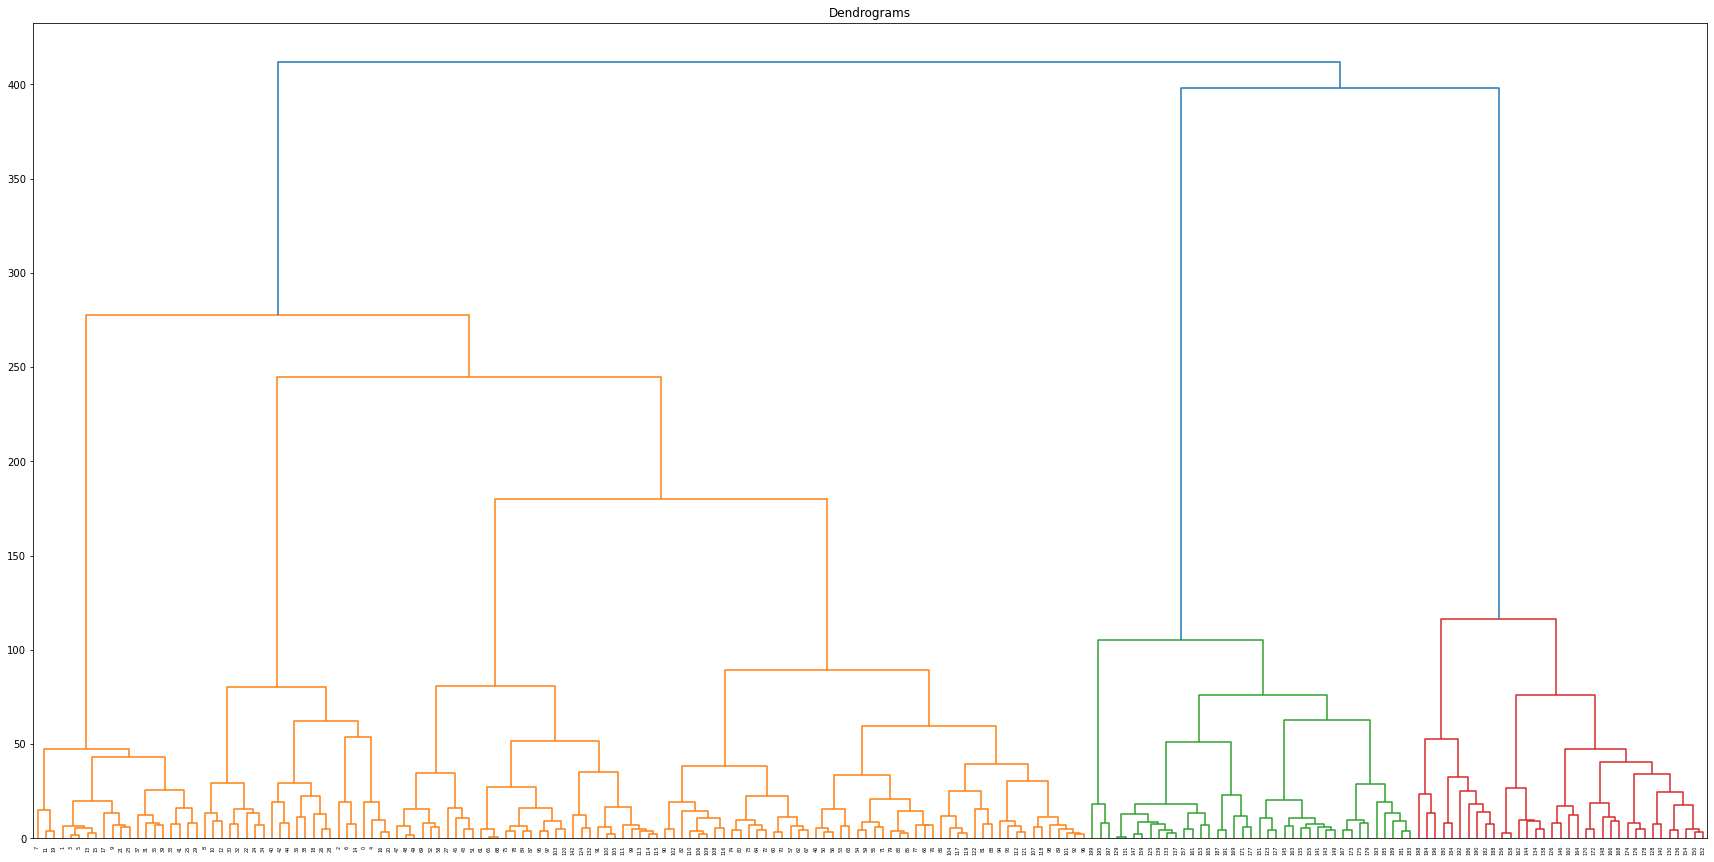

In [106]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(30, 15))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df, method='ward'))

In [107]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  

clusters = cluster.fit_predict(df)

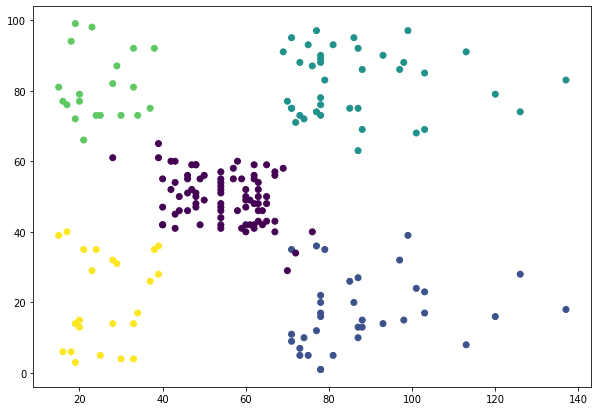

In [108]:
plt.figure(figsize=(10, 7))  
plt.scatter(df['Income'], df['Score'], c=cluster.labels_)
plt.show()